---
title: "Bayesian Econometrics - Problem Set - Estimating US Yield Curve"
author: "Ricardo Semião e Castro"
date: "2025/03/29"
---

# Introduction

The term structure of interest rates, known as the yield curve, illustrates the connection between the remaining time until debt securities mature and the yield they offer.  Yield curves serve multiple practical purposes, such as pricing different fixed-income securities. They are closely monitored by both market participants and policymakers, as they can provide valuable insights into the market’s sentiment regarding the future direction of the policy rate and the overall macroeconomic outlook.

The Nelson-Siegel model, introduced in [1], interpolates the yield curve (in terms of spot rates) by the following function:

$$
s(\tau)=\beta_{0}+\beta_{1}\cdot\left\{\frac{1-e^{-\tau/\lambda}}{\tau/\lambda}\right\}+\beta_{2}\cdot\left[\left\{\frac{1-e^{-\tau/\lambda}}{\tau\ /\lambda}\right\}-e^{-\tau/\lambda}\right]
$$
where $s(\tau)$ is the spot rate at any given time to maturity $\tau$, and $\beta_0$, $\beta_1$, $\beta_2$, and $\lambda$ are model parameters. This parametric model captures stylized shapes observed in yield curves, including monotonic, humped, and S-shaped curves. Parameters $\beta_0$, $\beta_1$, and $\beta_2$ are interpreted as the level, slope, and curvature factors, respectively, as they control the long, short, and medium segments of the curve. The decay parameter $\lambda$ determines the exponential decay rate (in months to maturity) of the slope and curvature factors, in addition to controlling the location of the hump (or trough) associated with the curvature factor.

We construct the term structure of interest rates by taking weekly closing prices zero coupon yields released by Bloomberg. We consider the following fixed maturities ($\tau$): 3, 6, 12, 24, 30, 36, 48, 60, 72, 84, 96, 108, 180, 240, and 360 months. The data covers three years, from the first week of 2019 until the last week of 2021.

Let $y_{it}$ denote the weekly yield on date $t$ ($t = 1, \ldots, 157$) at maturity $\tau_i$ ($i = 1, \ldots, 15$), i.e., $t = 1$ is the 1st week of 2019, $t = 157$ is the last week of 2021, and $\tau_1 = 3$, $\tau_2 = 6$, ..., $\tau_{15} = 360$. The yield is modelled by:

$$
y_{i t}=s(\tau_{i})+u_{i t},\quad u_{i t}\sim N I D(0,\sigma^{2})
$$

# Questions

Let $\theta \coloneqq (\beta_0, \beta_1, \beta_2, \lambda, \sigma^2)$ and $\theta_j$ denote the $j$-th element of $\theta$.

## Question 1

> Propose prior distributions for the parameters $\beta_0$, $\beta_1$, $\beta_2$, and $\lambda$ explaining your choices and listing all references used.

The topic of prior selection is important, and one must follow good practices. Lets start with support restrictions.

With $\sigma^2$ being a variance and $\lambda$ being the (positive) decay parameters, their prior distributions must have non-negative support.

The parameters associated with the interest rate levels, the $\beta$s, can also be tought as only non-negative in normal conditions, and could be modelled as such. However, in some cases, the interest rate can be negative, and one could consider distributions accordingly. For starters, I'll consider the $[0, \infty)$ restriction for the $\beta$s, and will relax this in the future if I can.

Now, to consider a family of distributions given these restrictions, we could look into past data and existing literature. Another important aspect to consider is using conjugate priors, as they imply in easier-to-work-with posterior distributions.

I will comply with common practices and use the Gamma family for the non-negative variables. Now, it is needed to define the parameters of each distribution:

- $\lambda$, $\beta_1$, and $\beta_2$ are multipliers, so I'll consider a Gamma distribution with mean $1$.
- $\sigma^2$ is a Normal variable variance, so I'll consider a mean of $1$, for standard normal.
- For the variances, I'll consider high levels, as to not restrict the posterior too much. For the means to be $1$, I'll have $\alpha = 0.1$ and $\beta = 10$, yielding a $\approx  3.1623$.
- For $\beta_0$, I'll set the prior's mean to be the same as the historical mean of the yields, approximatelly $1.25$. For that, I'll set $\alpha = 0.125$, and keep the same $\beta$.

All the parameters are set to be independent, from a Gamma distribution, each with its own parameters $\alpha_j$ and $\beta_j$.

$$
\begin{align*}
&\beta_1, \beta_2, \sigma^2, \lambda \sim G(0.1, 10),~~ \beta_0 \sim G(0.125, 10) \\
& \theta \sim \prod_{j=1}^5 F_G(\alpha_j, \beta_j) = F_G(0.125, 10) \cdot F_G(0.1, 10)^4\\
& p(\theta) \sim \prod_{j=1}^5 f_G(\theta_j; \alpha_j, \beta_j) = \left(\frac{\theta_0^{-0.875}e^{-0.1\theta_0}}{\theta_0^{0.125}\Gamma(0.125)}\right)\left(\prod_{j = 2}^4\frac{\theta_j^{-0.9}e^{-0.1\theta_j}}{\theta_j^{0.1}\Gamma(0.1)}\right)^4
\end{align*}
$$

Where $F_G(\alpha, \beta)$ and $f_G(x; \alpha, \beta)$ is the CDF and PDF of the Gamma distribution with parameters $\alpha$ and $\beta$, and $\Gamma(x)$ is the gamma function.

## Question 2

> Write the likelihood function of your model.

The likelihood function is:

$$
L(\theta) = p(y|\theta) \big|_y
$$

Thus, we need to find $p(y|\theta)$. Lets start with the given model of the yield, and substitute the NS model.

$$
\begin{align*}
y_{i t} &= s(\tau_{i})+u_{i t}\\
&= \beta_{0}+\beta_{1}\cdot\left\{\frac{1-e^{-\tau_i/\lambda}}{\tau_i/\lambda}\right\}+\beta_{2}\cdot\left[\left\{\frac{1-e^{-\tau_i/\lambda}}{\tau_i\ /\lambda}\right\}-e^{-\tau_i/\lambda}\right]+u_{i t}\\
\end{align*}
$$

Given the parameters in $\theta$, the only random term is $u_{it}$, such that $y_{it}|\theta \sim NID$. We must then find its parameterts (mean and variance). As $s(\tau_{i}) \perp u_{it}$, we can write:

$$
\begin{align*}
    E[y_{i t}|\theta] &= E[s(\tau_{i})|\theta] + E[u_{i t}|\theta] = s(\tau_{i}) + 0\\
    V[y_{i t}|\theta] &= V[s(\tau_{i})|\theta] + V[u_{i t}|\theta] = 0 + \sigma^2
\end{align*}
$$


So $y_{it}|\theta \sim NID(s(\tau_{i}), \sigma^2)$.

As $y_{it}|\theta$ is IID, we can write the joint (conditional) distribution as the multiplication of the individual (conditional) distributions:

$$
\begin{align*}
    p(y|\theta) &= \prod_{i=1}^{15} \prod_{t=1}^{157} \phi(y_{it}; s(\tau_{i}); \sigma^2)\\
    &= \prod_{i=1}^{15} \prod_{t=1}^{157} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y_{it}-s(\tau_{i}))^2}{2\sigma^2}\right)\\
    &= \prod_{i=1}^{15} \prod_{t=1}^{157} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{u_{it}^2}{2\sigma^2}\right)\\
    &= \prod_{i=1}^{15} \prod_{t=1}^{157} \phi(u_{it}; 0, \sigma^2)\\
\end{align*}
$$

## Question 3

> Propose (derive) an algorithm to estimate the parameters of the model (e.g, Gibbs sampler, Metropolis-Hastings, etc) showing all formulas required for implementation.

I am going to use a Metropolis-Hastings sampler. The algorithm is as below:

1. Guess a starting value $\theta^0$.
2. Propose a distribution to sample a next candidate $\theta^*$, $q$.
3. Set $\theta^i = \theta^*$ with probability $\alpha$ or as $\theta^{i-1}$ with the complementar, where $\alpha$ (called acceptance rate) is:
    
$$
\alpha\equiv\alpha(\theta^{(i-1)};\theta^{*})=\operatorname*{min}\left\{{\frac{p(\theta^{*}|y)}{q(\theta^{*}|\theta^{(i-1)})}}{\frac{q(\theta^{(i-1)}|\theta^{*})}{p(\theta^{(i-1)}|y)}},1\right\} =\\
\operatorname*{min}\left\{\frac{p(\theta^{*}|y)}{p(\theta^{(i-1)}|y)}\frac{q(\theta^{(i-1)}|\theta^{*})}{q(\theta^{*}|\theta^{(i-1)})},1\right\}
$$
    
4. Iterate $i = 1,2,\dots,N$ to get your sample.
5. We remove the first $N_0$ observations to remove dependence on the guess $\theta^0$. We end up with $N_1 = N - N_0$ samples.
6. We estimate our metric of interest $\hat \alpha \approx g(\theta)$ with $\frac{1}{N_1}\sum_{i=N_0+1}^N g(\theta^i)$.

The values for $N$ and $N_0$ are arbitrary, and will be left to be chosen during the coding implementation.

The proposed distribution $q$ is a normal distribution, with mean $\theta^{(i-1)}$ and variance $\sigma^2$. This is a common choice, as it is symmetric on the conditional, thus the second term of $\alpha$ is $1$. The posterior function will be proportional to the likelihood times the prior, and will be calculated like such in the code.

## Question 4

> Implement the proposed algorithm in your language of choice and present sampler diagnostics, using the data in weekly yield sheet.

To begin, we load the necessary libraries.

In [2]:
library(rlang)
library(tidyverse)
library(patchwork)
library(glue)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%@%()         masks rlang::%@%()
✖ dplyr::filter()      masks stats::filter()
✖ purrr::flatten()     masks rlang::flatten()
✖ purrr::flatten_chr() masks rlang::flatten_chr()
✖ purrr::flatten_dbl() masks rlang::flatten_dbl()
✖ purrr::flatten_int() masks rlang::flatten_int()
✖ purrr::flatten_lgl() masks rlang::flatten_lgl()
✖ purrr::flatten_raw() masks rlang::flatten_raw()
✖ purrr::invoke()      masks rlang::invoke()
✖ dplyr::lag()         masks stats::lag()
✖ purrr::splice()      masks rlang::splice()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Next, we load the yield data from an Excel file. We remove unnecessary columns, convert the data into a matrix format, and define the maturities (`taus`) and dimensions of the data.

In [3]:
data <- readxl::read_excel("Yields_Bloomberg.xlsx", sheet = "weekly yield") %>%
  select(-DATA) %>%
  as.matrix()

taus <- c(6, 12, 24, 30, 36, 48, 60, 72, 84, 96, 108, 240, 360)

n_t <- nrow(data)
n_tau <- length(taus)

We now define the prior distributions for the model parameters. Each parameter has its own prior distribution, and we also include a helper function to allow for using either the sampler function or the distribution function of the prior.

In [4]:
get_dist <- function(dfun, rfun, x, args, draw = FALSE) {
  if (draw) {
    do.call(rfun, c(n = 1, args))
  } else {
    do.call(dfun, c(x = unname(x), args))
  }
}

priors <- list(
  beta0 = \(x = NULL, draw = FALSE)  get_dist(dgamma, rgamma, 1/x, list(1, scale = 1), draw),
  beta1 = \(x = NULL, draw = FALSE)  get_dist(dgamma, rgamma, 1/x, list(1, scale = 1), draw),
  beta2 = \(x = NULL, draw = FALSE)  get_dist(dgamma, rgamma, 1/x, list(1, scale = 1), draw),
  lambda = \(x = NULL, draw = FALSE) get_dist(dgamma, rgamma, 1/x, list(1, scale = 1), draw),
  sigma = \(x = NULL, draw = FALSE)  get_dist(dgamma, rgamma, 1/x, list(1, scale = 1), draw)
)

n_theta <- length(priors)


Next, we create a function to compute the log of the prior distribution for the model parameters.

We use metaprogramming techinques to create a new function that is the (log of) the multiplication of all the priors.

This function will be used later in the Metropolis-Hastings algorithm to evaluate the posterior distribution.

In [5]:
get_prior <- function(priors, env = caller_env()) {
  calls <- map(names(priors), ~ parse_expr(glue("priors${.x}(theta['{.x}'])")))
  
  log_prior <- new_function(
    args = pairlist2(theta = ),
    body = reduce(calls, \(c1, c2) expr((!!c1) * (!!c2))),
    env = env
  )
}

log_prior <- \(x) log(get_prior(priors)(x))

We define functions to compute the spot rate (`s`) and residuals (`u`) based on the model parameters. The spot rate function calculates the yield curve values, while the residual function computes the difference between observed and modeled yields.

In [6]:
get_s <- function(tau, theta) {
  theta["beta0"] +
    (theta["beta1"] + theta["beta2"]) * ((1 - exp(-tau / theta["lambda"])) / (tau / theta["lambda"])) +
    theta["beta2"] * (1 - exp(-tau / theta["lambda"]))
}

get_u <- function(data, taus, theta) {
  data_u <- matrix(NA, n_t, n_tau)

  for (i in seq_len(n_tau)) {
    data_u[, i] <- data[, i] - get_s(taus[i], theta)
  }

  data_u
}

We now define the log likelihood function, which evaluates the likelihood of the observed data given the model parameters.

In [7]:
log_likelihood <- function(data, taus, theta) {
  u <- get_u(data, taus, theta)
  #sum(log(dnorm(u, 0, theta["sigma"]^2)))
  -0.5 * (n_t * n_tau) * log(2 * pi * theta["sigma"]^2) - 0.5 * sum(u^2) / theta["sigma"]^2
}

Finally, we implement the Metropolis-Hastings algorithm to sample from the posterior distribution of the model parameters. This iterative algorithm proposes new parameter values and accepts or rejects them based on their posterior probabilities.

The initial guess is a random sample from the priors.

In [8]:
n_s <- 3000

theta_sample <- matrix(NA, n_s, n_theta)
colnames(theta_sample) <- names(priors)

theta_sample[1, ] <- map_dbl(priors, ~.x(draw = TRUE))
post_new <- log_likelihood(data, taus, theta_sample[1,]) + log_prior(theta_sample[1,])


for (s in seq(2, n_s, 1)) {
  theta_sample[s,] <- map_dbl(priors, ~.x(draw = TRUE))

  post_old <- post_new
  post_new <- log_likelihood(data, taus, theta_sample[s,]) + log_prior(theta_sample[s,])

  if (runif(1) < min(exp(post_new - post_old), 1)) {
    theta_sample[s,] <- theta_sample[s,]
  } else {
    theta_sample[s,] <- theta_sample[s - 1,]
  }
}


Now we can format the sample and remove the initial values.

In [9]:
theta_sample <- as_tibble(theta_sample) %>%
  mutate(Iter = 1:n_s, .before = 1)

n_0 <- 500
theta_sample <- theta_sample[(n_0+1):n_s,]

Now, we can run diagnoses. Starting with plotting the series.

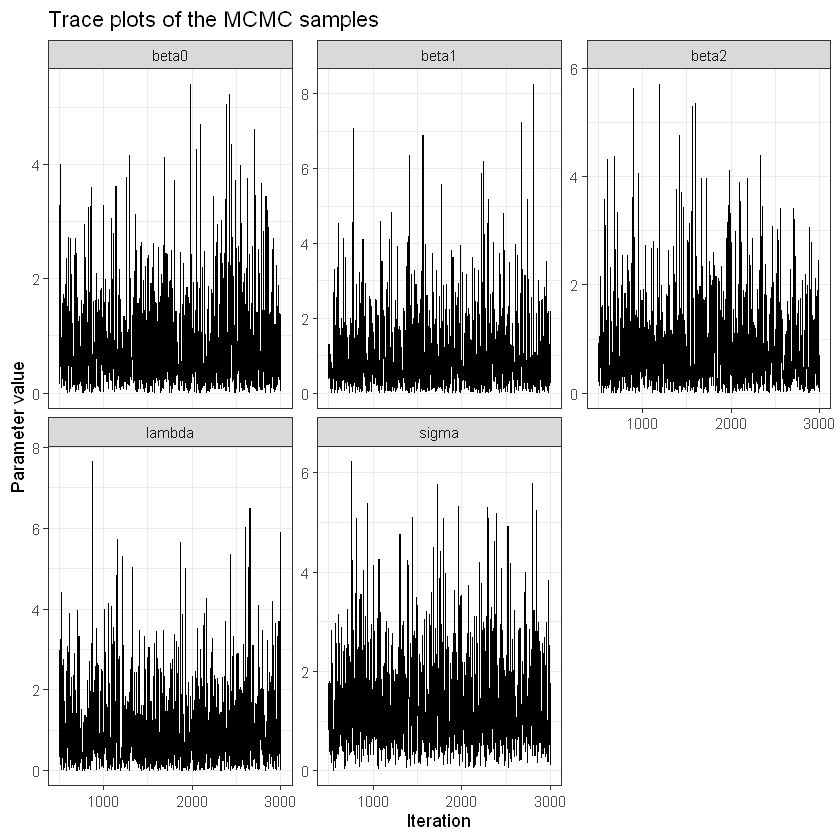

In [10]:
theme_set(theme_bw())

ggplot(pivot_longer(theta_sample, -Iter), aes(x = Iter, y = value)) +
  geom_line() +
  facet_wrap(vars(name), scales = "free_y") +
  labs(title = "Trace plots of the MCMC samples", y = "Parameter value", x = "Iteration")

We can see a possible dependence, but the result looks good overall. Lets plot some of the possible joint traceplots, to see the joint path of the coefficients.

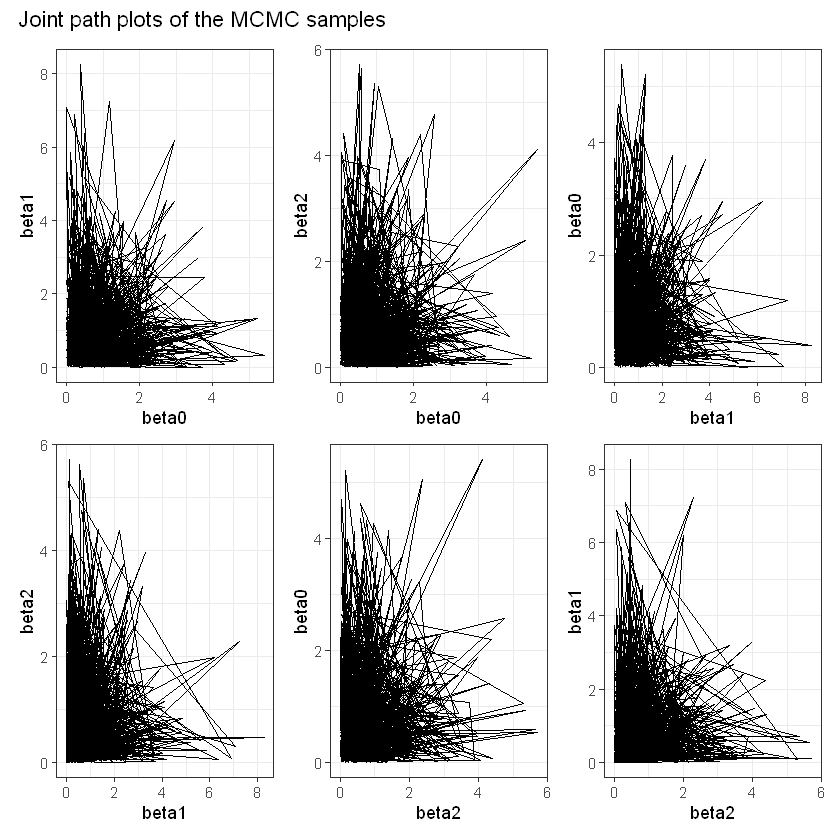

In [11]:
vars <- expand_grid(x1 = glue("beta{0:2}"), x2 = glue("beta{0:2}")) %>% filter(x1 != x2)

graphs <- pmap(vars, function(x1, x2) {
  ggplot(theta_sample, aes(x = !!sym(x1), y = !!sym(x2))) +
    geom_path()
})

wrap_plots(graphs, nrow = 2) + plot_annotation(title = "Joint path plots of the MCMC samples")  

To further investigate the dependence, we can plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the samples. This will be done using the `ggvar_acf` function from my own package [varr](https://ricardo-semiao.github.io/varr/) :)

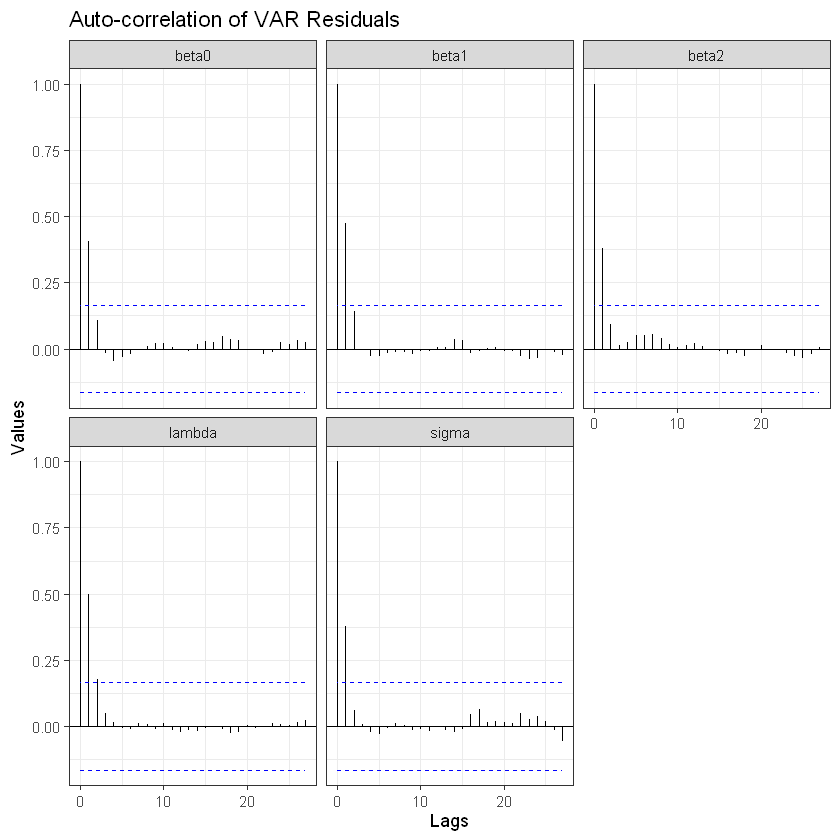

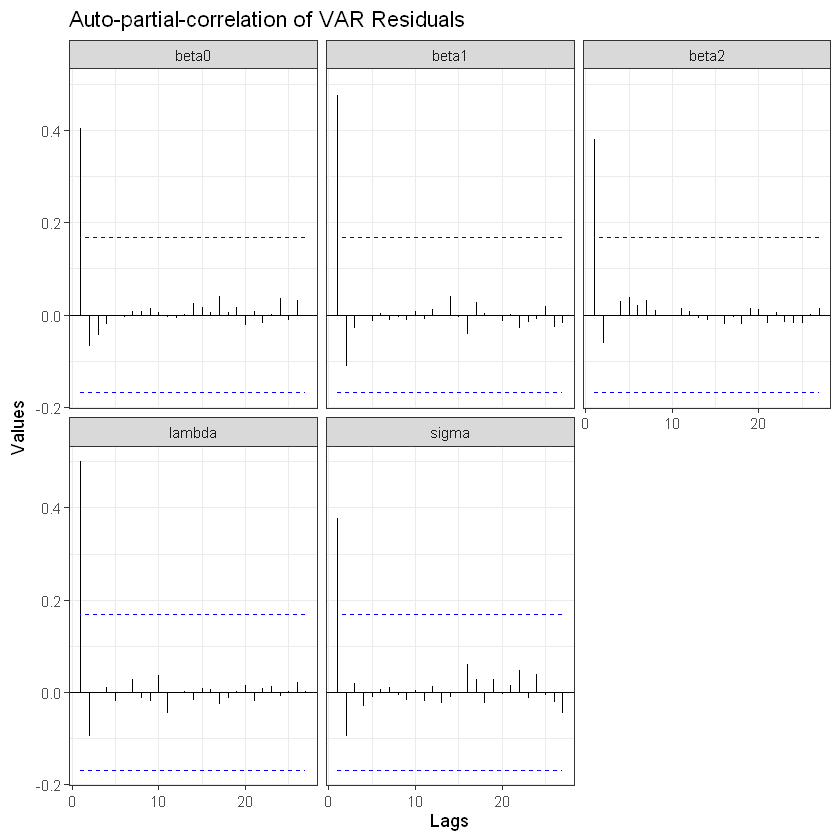

In [12]:
varr::ggvar_acf(select(theta_sample, -Iter))
varr::ggvar_acf(select(theta_sample, -Iter), type = "partial")

For the effective sample size calculation, I will use package `coda`.

In [13]:
mcmc_samples <- coda::as.mcmc(theta_sample %>% select(-Iter))
coda::effectiveSize(mcmc_samples)

beta0    beta1    beta2   lambda    sigma 
1320.158 1174.363 1269.965 1008.672 1367.447

We can see almost half of the samples are effective, which can not be a problem if we use a large enough sample size.

## Question 5

> Construct a table with summary statistics for all parameters, including respective standard errors.


We use the `sumtable` function to find relevant statistics.

In [14]:
vtable::sumtable(as.data.frame(theta_sample))

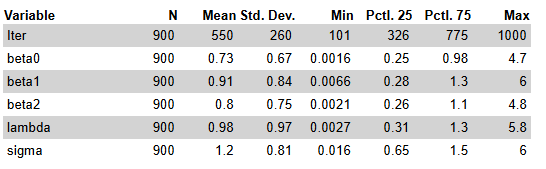

## Question 6

> Predict weekly yield on maturities 9, 15, 18, 21 and 120 months. Obtain a point estimate and 95% posterior predictive intervals.

I didn't had time to run the code, but the idea is to get the predictions for all the sample, and then annotate the relevant quantiles.

In [23]:
future::plan(future::multisession, workers = 7)

forecast <- map_dfr(c(9, 15, 18, 21, 120), function(tau) {
  spot_rates <- furrr:::future_map_dbl(split(theta_sample, 1:(n_s - n_0)), ~as.numeric(get_s(tau, .x)))
  tibble(
    Tau = tau,
    SpotRate = median(spot_rates, na.rm = TRUE),
    Lower = quantile(spot_rates, 0.05, na.rm = TRUE),
    Upper = quantile(spot_rates, 0.95, na.rm = TRUE)
  )
})


## Question 7

> Compare your prediction with the actual weekly yield, present in the forecast sheet.

We can then get the prediction errors, comparing with the mean of each maturity sample. We can also check the proprotion of times the values fell within the 95% interval.

We can see that the interval is not gathering 95% of the sample. Also, we see that longer maturities appear to be more accurate.

In [26]:
data_forecast <- readxl::read_excel("Yields_Bloomberg.xlsx", sheet = "forecast") %>%
  select(-DATA)

forecast %>%
  mutate(
    True = map_dbl(data_forecast, mean),
    Error = SpotRate - True,
    InsideCIProp = pmap_dbl(
        list(data_forecast, Lower, Upper),
        ~sum(..1 >= ..2 & ..1 <= ..3, na.rm = TRUE) / length(..1)
      )
  )

Tau,SpotRate,Lower,Upper,True,Error,InsideCIProp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,1.505527,0.4663149,3.820823,0.8543326,0.6511944,0.4012739
15,1.437747,0.4390148,3.722937,0.8898761,0.5478708,0.4267516
18,1.419402,0.4229382,3.698514,0.9075438,0.5118577,0.4458599
21,1.402685,0.4110387,3.671182,0.9251404,0.4775448,0.4713376
120,1.322425,0.3725742,3.576196,1.4572122,-0.1347868,1.0000000
